In [11]:
pip install --user theano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=ab078f55067fd98e2db73ec241b5d910eef2286c25770def6e048d9ae4bbe57b
  Stored in directory: /home/jovyan/.cache/pip/wheels/26/1f/2f/02d738022626461828148150c0354e712c4ad74f1a60f10933
Successfully built theano
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the CSV file to examine its structure
file_path = '/home/jovyan/MyFolder/Project/samples_big_no_phi_delta11_01.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the format
data.head(), data.shape


(      beta0  beta_LUT  beta_Humid  beta_TEMP     alpha   rho_int   rho_slo  \
 0 -7.585284 -0.004805   -0.062381   0.215918 -0.421799  0.023170  0.089909   
 1 -7.557590 -0.004750   -0.062472   0.215217 -0.408405  0.054201  0.092967   
 2 -7.624084 -0.004874   -0.062252   0.217089 -0.412970  0.013741  0.046707   
 3 -7.624899 -0.004867   -0.062213   0.216993 -0.415976  0.018263  0.050146   
 4 -7.624998 -0.004801   -0.062194   0.216891 -0.410475  0.008631  0.111790   
 
     tau_int   tau_slo  
 0  1.103298  1.179314  
 1  1.183658  1.062173  
 2  1.073465  1.060308  
 3  1.052011  1.047350  
 4  1.123130  1.152574  ,
 (4000, 9))

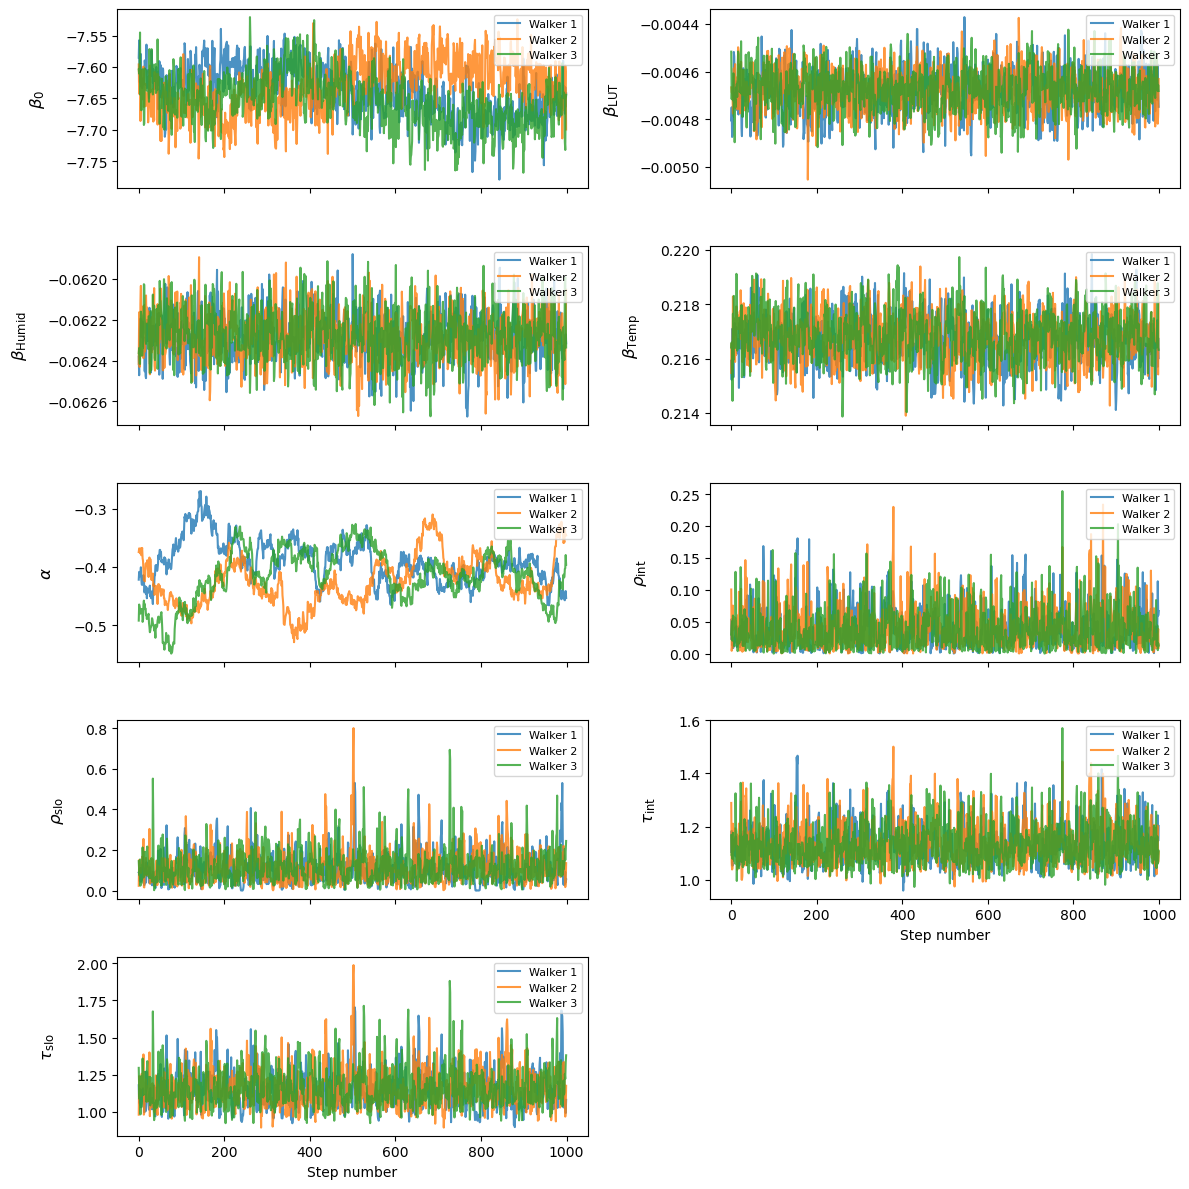

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Extract samples and split by walkers
num_walkers = 3
samples_per_walker = 1000

# Splitting data for each walker
walkers = [
    data.iloc[i * samples_per_walker : (i + 1) * samples_per_walker].reset_index(drop=True)
    for i in range(num_walkers)
]

# Labels for the plots
labels = [
    r"$\beta_0$", r"$\beta_{\text{LUT}}$", r"$\beta_{\text{Humid}}$", r"$\beta_{\text{Temp}}$",
    r"$\alpha$", r"$\rho_{\text{int}}$", r"$\rho_{\text{slo}}$",
    r"$\tau_{\text{int}}$", r"$\tau_{\text{slo}}$"
]

# Create plots
fig, axes = plt.subplots(5, 2, figsize=(12, 12), sharex=True)
axes = axes.flatten()

# Parameter names corresponding to column names
param_names = ['beta0', 'beta_LUT', 'beta_Humid', 'beta_TEMP', 'alpha', 
               'rho_int', 'rho_slo', 'tau_int', 'tau_slo']

# Plotting each parameter
for idx, ax in enumerate(axes):
    if idx < len(param_names):
        param = param_names[idx]
        for i, walker_data in enumerate(walkers):
            ax.plot(walker_data[param], label=f'Walker {i + 1}', alpha=0.8)
        ax.set_ylabel(labels[idx], rotation=90, labelpad=20, fontsize=12, va='center')
        ax.legend(fontsize=8, loc='upper right')
    else:
        ax.axis('off')  # Hide unused axes

# Shared x-label for bottom plots
axes[-3].tick_params(axis='x', which='both', bottom=True, labelbottom=True)
axes[-3].set_xlabel("Step number")
axes[-2].set_xlabel("Step number")

plt.tight_layout()
fig.savefig("sampling_big.png", format="png")
plt.show()


In [26]:
import numpy as np
import pandas as pd

# Load the data
file_path = '/home/jovyan/MyFolder/Project/samples_big_no_phi_delta11_01.csv'
data = pd.read_csv(file_path)

# Remove the last walker (last 1000 samples)
data_trimmed = data.iloc[:-1000]

# Define a function to calculate the mean and 95% confidence interval
def calculate_statistics(samples):
    mean = np.mean(samples)
    lower, upper = np.percentile(samples, [2.5, 97.5])  # 95% confidence interval
    return mean, (lower, upper)

# Iterate over each parameter and calculate statistics
results = {}
for column in data_trimmed.columns:
    mean, conf_interval = calculate_statistics(data_trimmed[column])
    results[column] = {"mean": mean, "95% CI": conf_interval}

# Print the results
for param, stats in results.items():
    print(f"{param}: Mean = {stats['mean']:.4f}, 95% CI = [{stats['95% CI'][0]:.4f}, {stats['95% CI'][1]:.4f}]")


beta0: Mean = -7.6412, 95% CI = [-7.7224, -7.5607]
beta_LUT: Mean = -0.0047, 95% CI = [-0.0049, -0.0045]
beta_Humid: Mean = -0.0623, 95% CI = [-0.0625, -0.0620]
beta_TEMP: Mean = 0.2168, 95% CI = [0.2150, 0.2186]
alpha: Mean = -0.4099, 95% CI = [-0.4997, -0.3254]
rho_int: Mean = 0.0396, 95% CI = [0.0014, 0.1228]
rho_slo: Mean = 0.1134, 95% CI = [0.0114, 0.3066]
tau_int: Mean = 1.1337, 95% CI = [1.0193, 1.3190]
tau_slo: Mean = 1.1558, 95% CI = [0.9631, 1.4552]


In [27]:
# Calculate mean and 95% confidence intervals for tau_int^2 and tau_slo^2
def calculate_squared_statistics(samples):
    squared_samples = samples ** 2  # Square the samples
    mean = np.mean(squared_samples)
    lower, upper = np.percentile(squared_samples, [2.5, 97.5])  # 95% confidence interval
    return mean, (lower, upper)

# Extract columns for tau_int and tau_slo, and calculate statistics for their squares
tau_int_squared_stats = calculate_squared_statistics(data_trimmed["tau_int"])
tau_slo_squared_stats = calculate_squared_statistics(data_trimmed["tau_slo"])

# Print the results
print(f"tau_int^2: Mean = {tau_int_squared_stats[0]:.4f}, 95% CI = [{tau_int_squared_stats[1][0]:.4f}, {tau_int_squared_stats[1][1]:.4f}]")
print(f"tau_slo^2: Mean = {tau_slo_squared_stats[0]:.4f}, 95% CI = [{tau_slo_squared_stats[1][0]:.4f}, {tau_slo_squared_stats[1][1]:.4f}]")


tau_int^2: Mean = 1.2912, 95% CI = [1.0389, 1.7398]
tau_slo^2: Mean = 1.3525, 95% CI = [0.9275, 2.1176]


Number of parameters after trimming: 7


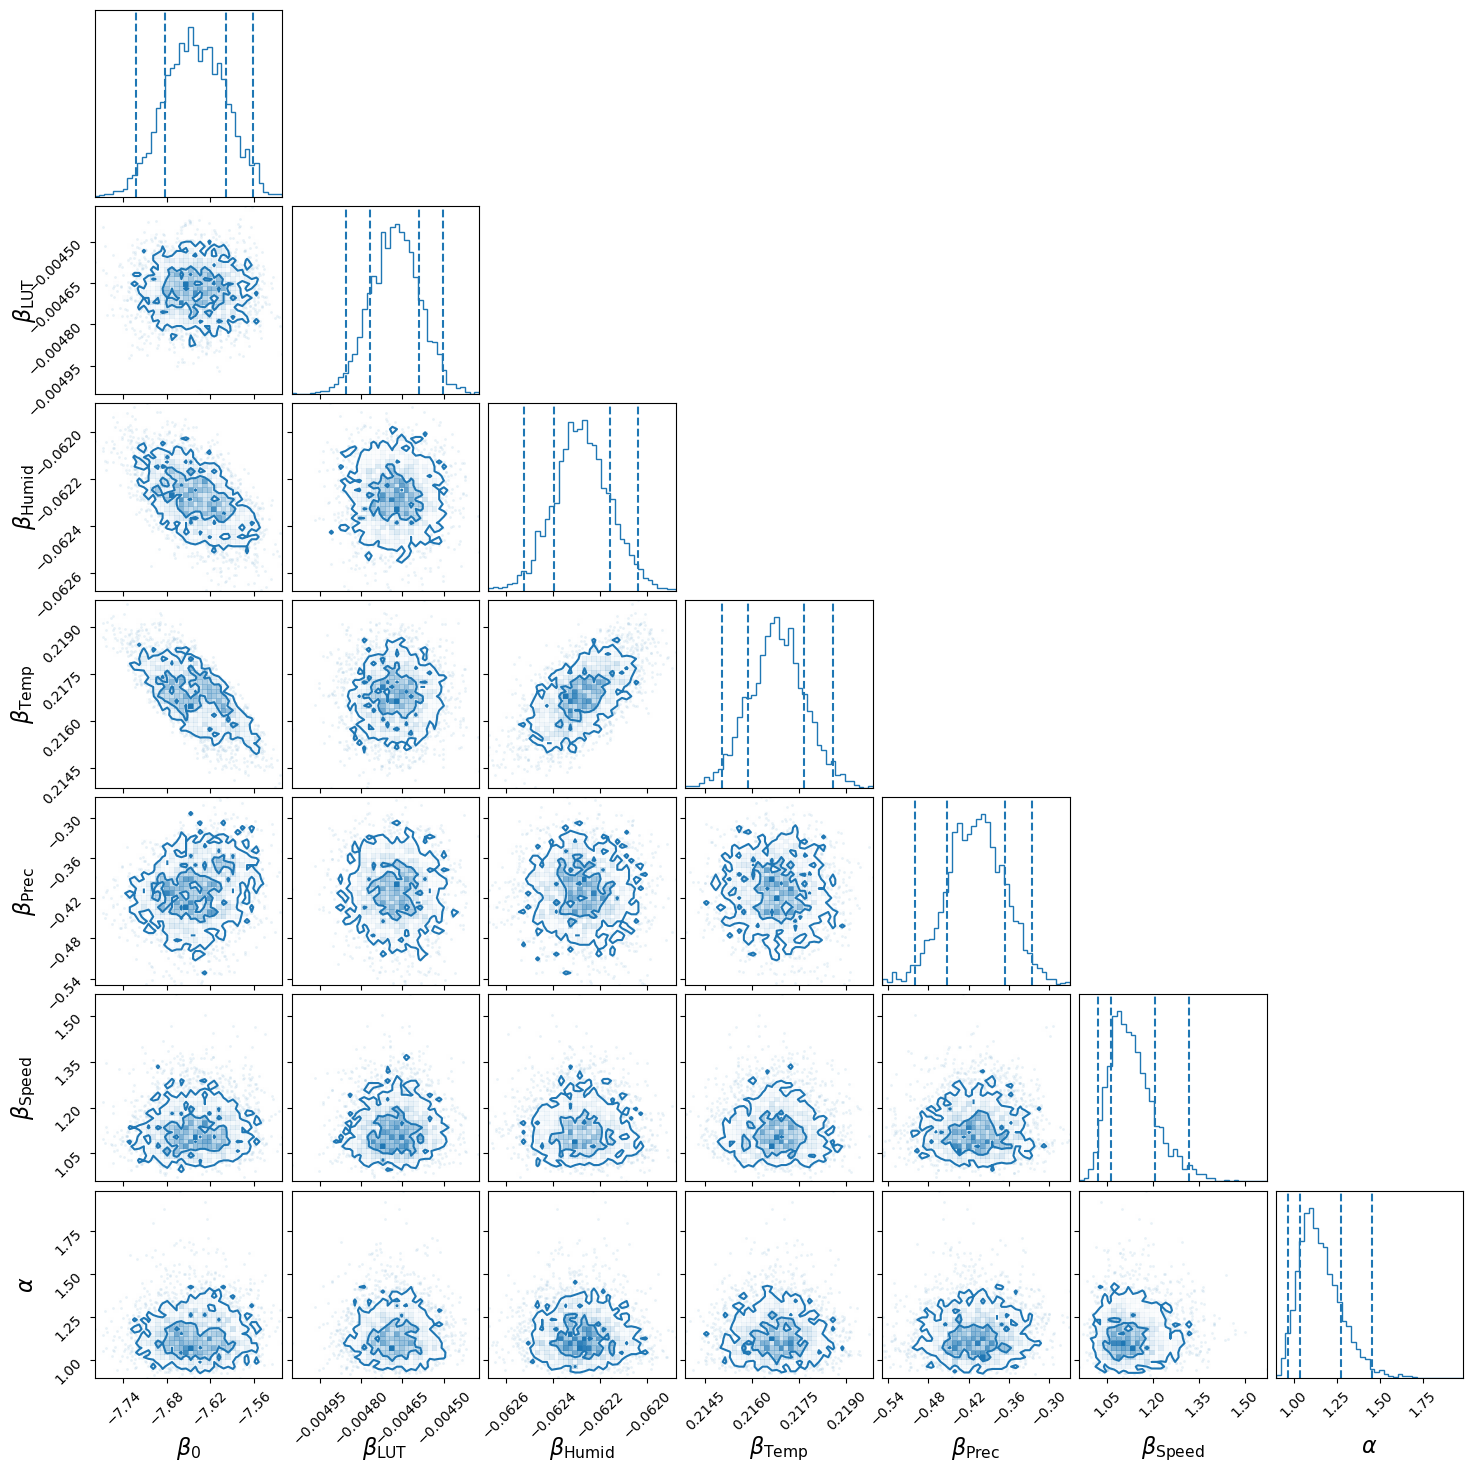

beta0        -7.641223
beta_LUT     -0.004677
beta_Humid   -0.062279
beta_TEMP     0.216781
alpha        -0.409928
tau_int       1.133693
tau_slo       1.155773
dtype: float64

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

# Load the CSV file
file_path = '/home/jovyan/MyFolder/Project/samples_big_no_phi_delta11_01.csv'
data = pd.read_csv(file_path)

# Remove the last walker's data (last 1000 points)
data_trimmed = data.iloc[:-1000].copy()

# Drop `rho_slo` and `rho_int` columns
data_trimmed = data_trimmed.drop(columns=["rho_slo", "rho_int"])

# Save the cleaned and reduced data for reference (optional)
np.savetxt("samples_big_no_phi_delta11_01_cleaned_reduced.csv", data_trimmed.values, delimiter=",")

# Calculate parameter means for the trimmed data
params_means_trimmed = data_trimmed.mean(axis=0)
print("Number of parameters after trimming:", len(params_means_trimmed))

# Update labels to exclude `rho_slo` and `rho_int`
labels_reduced = [
    r"$\beta_0$", r"$\beta_{\text{LUT}}$", r"$\beta_{\text{Humid}}$", r"$\beta_{\text{Temp}}$",
    r"$\beta_{\text{Prec}}$", r"$\beta_{\text{Speed}}$", r"$\alpha$",
    r"$\tau_{\text{int}}$", r"$\tau_{\text{slo}}$"
]

# Create the corner plot
fig = plt.figure(figsize=(15, 15))
fig = corner.corner(
    data_trimmed.values, bins=40, labels=labels_reduced, color="C0",
    levels=1-np.exp(-0.5*np.array([1, 2])**2),
    quantiles=[0.025, 0.16, 0.84, 0.975],
    fig=fig, label_kwargs={"fontsize": 16}
)

# Add a legend
fig.get_axes()[0].plot([], [], c="C0", label="Samples from the posterior")
fig.savefig("corner_big_reduced.png", format="png")

plt.show()

params_means_trimmed



In [4]:
# Load the CSV files for phi and delta
phi_file_path = '/home/jovyan/MyFolder/Project/samples_big_phi11_01.csv'
delta_file_path = '/home/jovyan/MyFolder/Project/samples_big_delta11_01.csv'

phi_data = pd.read_csv(phi_file_path, header=None)
delta_data = pd.read_csv(delta_file_path, header=None)

# Displaying basic info to understand structure
phi_data.head(), phi_data.shape, delta_data.head(), delta_data.shape


(        0         1         2         3         4         5         6    \
 0  1.420432  0.757338 -0.028682  2.139951  1.830121 -3.285330  0.471838   
 1  1.497169  0.852421 -0.038002  2.157790  1.883383 -2.968994  0.456441   
 2  1.399569  0.903121 -0.066990  2.132937  1.826503 -3.307464  0.470821   
 3  1.406628  0.893617 -0.076132  2.133249  1.818019 -3.301456  0.469701   
 4  1.386462  0.921402 -0.086836  2.136385  1.819266 -3.177547  0.488864   
 
         7         8         9    ...       548       549       550       551  \
 0 -1.500851  0.037797 -0.115345  ...  0.616539 -0.030382  1.000475 -0.126541   
 1 -1.513026  0.027061 -0.135326  ...  0.653213  0.057979  1.033955 -0.172207   
 2 -1.514305  0.083614 -0.121067  ...  0.616244 -0.046218  0.909279 -0.209560   
 3 -1.533731  0.062837 -0.121070  ...  0.618329 -0.048612  0.897348 -0.232827   
 4 -1.480374  0.094998 -0.121515  ...  0.576672 -0.075766  0.948038 -0.180282   
 
         552       553       554       555       556  

In [63]:
phi_file_path = '/home/jovyan/MyFolder/Project/samples_big_phi11_01.csv'
delta_file_path = '/home/jovyan/MyFolder/Project/samples_big_delta11_01.csv'
# Load the CSV file to examine its structure
file_path = '/home/jovyan/MyFolder/Project/samples_big_no_phi_delta11_01.csv'




data = pd.read_csv(file_path)
Phi = pd.read_csv(phi_file_path, header=None).to_numpy()
Delta = pd.read_csv(delta_file_path, header=None).to_numpy()


# Flattened parameter arrays
Beta0 = data["beta0"].to_numpy()[:-1000]
Beta1 = data["beta_LUT"].to_numpy()[:-1000]
Beta2 = data["beta_Humid"].to_numpy()[:-1000]
Beta3 = data["beta_TEMP"].to_numpy()[:-1000]


# Additional parameters
Alpha = data["alpha"].to_numpy()[:-1000]
Rho_int = data["rho_int"].to_numpy()[:-1000]
Rho_slo = data["rho_slo"].to_numpy()[:-1000]
Tau_int = data["tau_int"].to_numpy()[:-1000]
Tau_slo = data["tau_slo"].to_numpy()[:-1000]




In [64]:
Phi_mean = np.mean(Phi, axis=0)

Delta_mean = np.mean(Delta, axis=0)

Beta0 =np.mean(Beta0,axis=0)
Beta1 =np.mean(Beta1,axis=0)
Beta2 =np.mean(Beta2,axis=0)
Beta3 =np.mean(Beta3,axis=0)
Alpha =np.mean(Alpha,axis=0)

In [65]:
import os

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as pt

import libpysal

from geopandas import read_file

def get_biome_data(data):

    df = pd.read_csv(data, sep='\t')

    vec_LUT = df["vec_LUT"].to_numpy()
    vec_Prec = df["vec_Prec"].to_numpy()
    vec_Temp = df["vec_Temp"].to_numpy()
    vec_Humid = df["vec_Humid"].to_numpy()
    vec_Speed = df["vec_Speed"].to_numpy()
    vec_Area = df["vec_Area"].to_numpy()

    data = [vec_LUT, vec_Prec, vec_Temp, vec_Humid, vec_Speed, vec_Area]

    t = df["vec_Month"].to_numpy()

    munic = df["vec_Munic"].to_numpy()

    FS = df["vec_FS"].to_numpy()

    return [data, t, munic, FS]


def get_W(biome_W):
    return np.array( [np.array(biome_W.iloc[i,0].split(','), dtype='int')
                                   for i in range(0, biome_W.shape[0])])

Amazon_Rainforest = get_biome_data('/home/jovyan/MyFolder/Project/Data/Data_Amazonia.txt')
Amazon_Rainforest_W = get_W(pd.read_csv('/home/jovyan/MyFolder/Project/Data/W_Amazonia.csv', sep='\t'))

biome = Amazon_Rainforest
W = np.array(Amazon_Rainforest_W)


data = biome[0]
t = biome[1]
FS = biome[-1]

data_length = len(FS)
n_munic = np.size(W, 0)

LUT = data[0]
HUMID = data[3]
TEMP = data[2]
area = data[-1]

In [66]:
Mu_new = np.exp(Beta0 + Beta1*LUT + Beta2*HUMID + Beta3*TEMP + 
                       np.concatenate([Phi_mean] * T_value) + (Alpha + np.concatenate([Delta_mean] * T_value))*(t-(T_value/2+0.5))/T_value)*area


In [68]:
file_path = '/home/jovyan/MyFolder/Project/samples_samll_no_phi_delta14_33.csv'




data = pd.read_csv(file_path)
Phi = pd.read_csv(phi_file_path, header=None).to_numpy()
Delta = pd.read_csv(delta_file_path, header=None).to_numpy()


# Flattened parameter arrays
Beta0 = data["beta0"].to_numpy()
Beta1 = data["beta_LUT"].to_numpy()
Beta2 = data["beta_Humid"].to_numpy()
Beta3 = data["beta_TEMP"].to_numpy()


# Additional parameters
Alpha = data["alpha"].to_numpy()


Phi_mean = np.mean(Phi, axis=0)

Delta_mean = np.mean(Delta, axis=0)

Beta0 =np.mean(Beta0,axis=0)
Beta1 =np.mean(Beta1,axis=0)
Beta2 =np.mean(Beta2,axis=0)
Beta3 =np.mean(Beta3,axis=0)
Alpha =np.mean(Alpha,axis=0)

Mu_new_small = np.exp(Beta0 + Beta1*LUT + Beta2*HUMID + Beta3*TEMP  + (Alpha)*(t-(T_value/2+0.5))/T_value)*area

In [67]:
def give_avg_month_cal(Mu_new):

    Mu_avg_month_cal = np.zeros(12)

    for k in range(10):

        temp = np.zeros(12*n_munic)

        temp += Mu_new[k*n_munic*12: (k+1)*n_munic*12]

        for i in range(12):

            Mu_avg_month_cal[i] += sum(temp[i*n_munic:(i+1)*n_munic])/(n_munic*10)

    return Mu_avg_month_cal

Mu_avg_month_cal = give_avg_month_cal(Mu_new)
FS_avg_month_cal = give_avg_month_cal(FS)

In [72]:
def give_avg_month_cal(Mu_new):

    Mu_avg_month_cal = np.zeros(12)

    for k in range(10):

        temp = np.zeros(12*n_munic)

        temp += Mu_new[k*n_munic*12: (k+1)*n_munic*12]

        for i in range(12):

            Mu_avg_month_cal[i] += sum(temp[i*n_munic:(i+1)*n_munic])/(n_munic*10)

    return Mu_avg_month_cal

Mu_avg_month_cal_small = give_avg_month_cal(Mu_new_small)
FS_avg_month_cal = give_avg_month_cal(FS)

   vec_Munic  vec_Month  vec_Area  vec_FS  vec_LUT  vec_Prec   vec_Temp  \
1    1500107          1  1610.652       3    1.078  0.550538  26.316667   
2    1500131          1   614.131       0    0.250  0.365905  25.543264   
3    2100055          1  5808.304       4    4.570  0.328655  25.737003   
4    1500206          1  4344.384       6    4.300  0.397751  26.066881   
5    1200013          1  1807.953       0    1.230  0.573202  24.771592   

   vec_Humid  vec_Speed  
1  81.385753   0.909005  
2  79.016691   1.386955  
3  77.551571   1.549899  
4  79.872620   1.200555  
5  87.530914   0.958162  
Chi^2 Value: 46.93901596277701
P-value: 5.84645065883871e-09


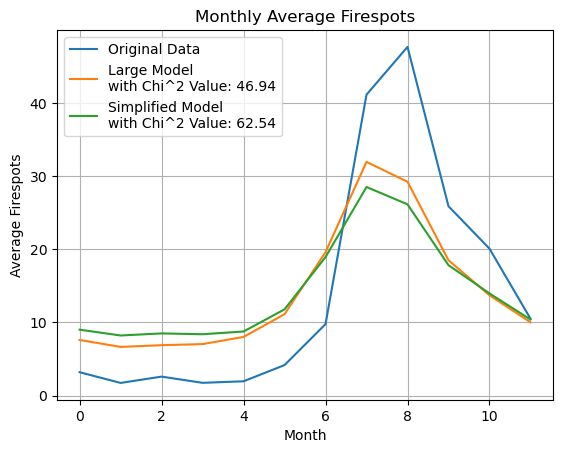

In [80]:
import scipy.stats as stats

def chi2_statistic(observed, expected):
    # Prevent division by zero by adding a small value
    return np.sum((observed - expected) ** 2 / (expected))


file_path = '/home/jovyan/MyFolder/Project/Data/Data_Amazonia.txt'

try:
  df = pd.read_csv(file_path, sep='\t')  # Assuming tab-separated values
  print(df.head())  # Print the first few rows of the DataFrame
except FileNotFoundError:
  print(f"File not found at: {file_path}")
except pd.errors.ParserError:
  print(f"Error parsing the file at: {file_path}. Check the file format.")


# df_sorted_ = df.sort_values(by=["vec_Munic","vec_Month"])
# df_fitted_sorted = df_fitted.sort_values(by=["vec_Munic","vec_Month"])
# df_sorted_["vec_Month"] = np.tile(np.arange(1, 13), 5580)
# df_fitted_sorted["vec_Month"] = np.tile(np.arange(1, 13), 5580)
# monthly_mean_original_data = df_sorted_.groupby("vec_Month")["vec_FS"].mean()
# monthly_mean_fitted_data = df_fitted_sorted.groupby("vec_Month")["vec_FS"].mean()

# Calculate Chi-squared value as you've already done
observed_counts = FS_avg_month_cal
expected_counts = Mu_avg_month_cal
expected_counts_small = Mu_avg_month_cal_small

chi2_value = chi2_statistic(observed_counts, expected_counts)
print(f"Chi^2 Value: {chi2_value}")

chi2_value_small = chi2_statistic(observed_counts, expected_counts_small)

# Degrees of freedom (df) is the number of observations minus 1
df = len(observed_counts) - 7  # 12 months - 7 parameters (6 beta, 1 alpha)

# Calculate p-value using the Chi-squared distribution's survival function (1 - CDF)
p_value = stats.chi2.sf(chi2_value, df)
print(f"P-value: {p_value}")

# Plot the observed and fitted data
plt.plot(observed_counts, label="Original Data")
plt.plot(expected_counts, label="Large Model \nwith Chi^2 Value: {:.2f}".format(chi2_value))
plt.plot(expected_counts_small, label="Simplified Model \nwith Chi^2 Value: {:.2f}".format(chi2_value_small))


plt.xlabel("Month")
plt.ylabel("Average Firespots")
plt.title("Monthly Average Firespots")
plt.legend()
plt.grid(True)

plt.savefig("so_schön.png", format="png")
plt.show()

In [35]:
print(np.shape(Mu_new))

(66960,)


In [29]:
T_value = 120

def give_Mu():

    Mu = np.zeros((len(Beta0), T_value*n_munic))

    for i in range(len(Mu)):

        Mu[i] = np.exp(Beta0[i] + Beta1[i]*LUT + Beta2[i]*HUMID + Beta3[i]*TEMP + 
                       np.concatenate([Phi[i]] * T_value) + (Alpha[i] + np.concatenate([Delta[i]] * T_value))*(t-(T_value/2+0.5))/T_value)*area

    return Mu


Mu = give_Mu()

def give_MU_month_tot():

    MU_month_tot = np.zeros((len(Beta0), T_value))

    for i in range(T_value):
        for k in range(len(Mu)):

            MU_month_tot[k][i] = sum(Mu[k][(i-1)*n_munic: i*n_munic])/n_munic

    return MU_month_tot


MU_month_tot = give_MU_month_tot()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (12,).

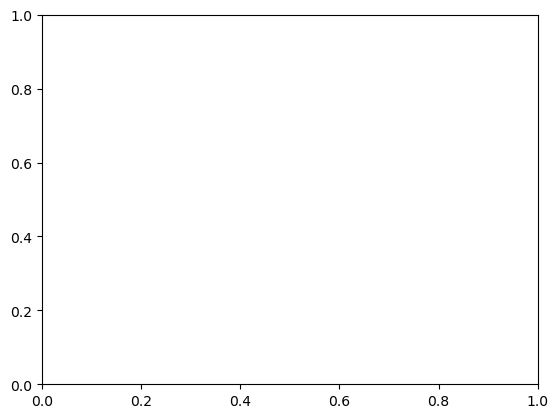

In [27]:
plt.figure()

bar_width = 0.35

x_pos = np.arange(len(labels))

x_pos_additional = x_pos + bar_width

bins = np.arange(0, 12)

hist_FS, edges = np.histogram(FS, bins=np.append(bins, np.inf))

normalized_hist_FS = hist_FS / len(FS)

hist_mu, edges = np.histogram(Mu, bins=np.append(bins, np.inf))

normalized_hist_mu = hist_mu / len(FS)

labels = [str(i) for i in range(11)] + ['>10']

plt.bar(x_pos, normalized_hist_FS, width=bar_width, color='skyblue', edgecolor='black')

plt.bar(x_pos_additional, normalized_hist_mu, width=bar_width, color='r', edgecolor='black', alpha=0.7)
# plt.set_title(biomenames[k].replace("", " "), fontsize=14)

plt.xticks(x_pos + bar_width / 2, labels)
plt.ylim(bottom=None, top=1)
plt.grid(True, axis='y')
plt.show()